##### 1. Load and View a Grayscale Image
##### Start by loading an image in grayscale and displaying it using matplotlib.
##### What does the array representation of the image look like?
##### What is the shape, data type, and pixel range?

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_pil = Image.open("C:/Users/bbuser/Downloads/aurora.jpg")
print(f"PIL Image format: {img_pil.format}, size: {img_pil.size}, mode: {img_pil.mode}")

PIL Image format: JPEG, size: (736, 487), mode: RGB


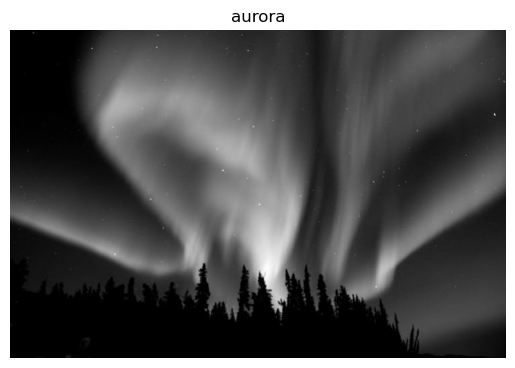

In [2]:
plt.imshow(img_pil)
plt.title('aurora')
plt.axis('off')
plt.show()

In [3]:
img_array = np.array(img_pil)

print("1. Type of the object:", type(img_array))  

print("2. Shape of the image (height, width, channels):", img_array.shape)  

print("3. Data type of pixel values:", img_array.dtype)  

print("4. Minimum and maximum pixel values in the image:", img_array.min(), "to", img_array.max())  

1. Type of the object: <class 'numpy.ndarray'>
2. Shape of the image (height, width, channels): (487, 736, 3)
3. Data type of pixel values: uint8
4. Minimum and maximum pixel values in the image: 0 to 255


##### 2. Brighten the Image
##### Try adding a fixed value (e.g., +50) to all pixel values of the grayscale image.
##### How does the image change?
##### What happens if a pixel value exceeds 255?

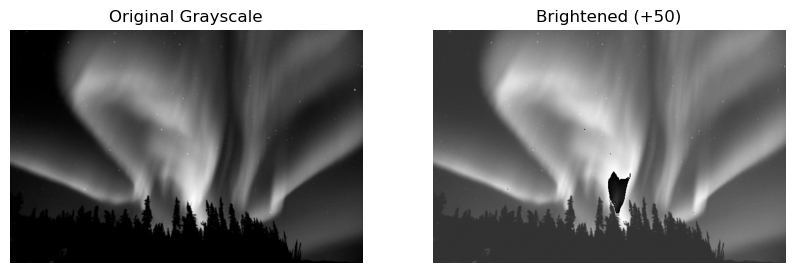

In [4]:
img_gray = img_pil.convert("L")

img_array = np.array(img_gray)

brightened = np.clip(img_array + 50, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brightened, cmap='gray')
plt.title("Brightened (+50)")
plt.axis('off')

plt.show()


# The entire image looks brighter.

# Darker areas get lighter, and light areas become even lighter.

# Contrast might reduce slightly because everything shifts upward.

##### 3. Add a Higher Value
##### Now try adding a much higher value (e.g., +300) to the image.
##### Do you get the result you expect?
##### Can you explain what’s going wrong?
##### Try using np.clip() to keep values between 0 and 255.

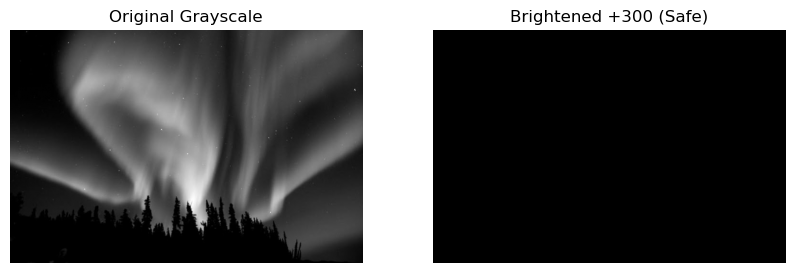

In [5]:
img_array_int = img_array.astype(np.int16)  # or just int32

brightened_int = img_array_int + 300

brightened_clipped = np.clip(brightened_int, 0, 255)

brightened = brightened_clipped.astype(np.uint8)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brightened, cmap='gray')
plt.title("Brightened +300 (Safe)")
plt.axis('off')

plt.show()

##### 4. Subtract to Darken
##### Subtract a fixed value (e.g., -100) from the image.
##### What happens to the dark regions?
##### Are any values going below 0?
##### Use .clip(0, 255) to fix underflow and observe the difference.

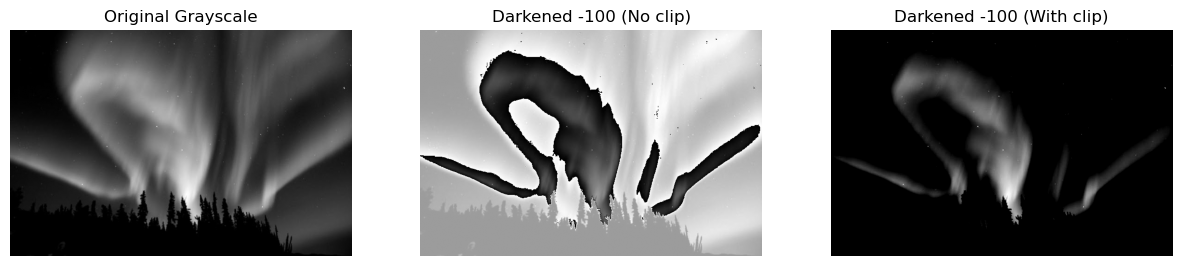

In [6]:
img_int = img_array.astype(np.int16)

darkened_underflow = (img_int - 100).astype(np.uint8)

darkened_clipped = np.clip(img_int - 100, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(darkened_underflow, cmap='gray')
plt.title("Darkened -100 (No clip)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(darkened_clipped, cmap='gray')
plt.title("Darkened -100 (With clip)")
plt.axis('off')

plt.show()

# Subtracting from dark pixels can make values go below 0, causing unwanted wrap-around (bright spots). 
# Using np.clip(0, 255) stops this and keeps dark areas correctly dark.

##### 5. Transpose the Image
##### Transpose the image array using .T or np.transpose().
##### What happens to the orientation of the image?
##### Does this feel like a flip, a rotation, or something else?

In [7]:
img_transposed = img_array.

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_transposed, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')

plt.show()

SyntaxError: invalid syntax (3446980075.py, line 1)

##### 6. Flip the Image Horizontally and Vertically
##### Use np.fliplr() (left–right) and np.flipud() (up–down).
##### How do these flips affect the image visually?
##### How are they different from transpose?

In [ ]:
flip_lr = np.fliplr(img_array)

flip_ud = np.flipud(img_array)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(flip_lr, cmap='gray')
plt.title("Flipped Left–Right")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(flip_ud, cmap='gray')
plt.title("Flipped Up–Down")
plt.axis('off')

plt.show()

##### 7. Slice (Crop) a Section of the Image
##### Extract a 100×100 region from the center of the image using slicing.
##### What part of the image are you extracting?
##### Try slicing other regions — top-left, bottom-right, etc.

In [ ]:
height, width = img_array.shape

crop_size = 100

center_y = height // 2
center_x = width // 2
crop_center = img_array[center_y - 50:center_y + 50, center_x - 50:center_x + 50]

crop_top_left = img_array[0:100, 0:100]
crop_bottom_right = img_array[-100:, -100:]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(crop_center, cmap='gray')
plt.title("Center Crop")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(crop_top_left, cmap='gray')
plt.title("Top-Left Crop")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(crop_bottom_right, cmap='gray')
plt.title("Bottom-Right Crop")
plt.axis('off')

plt.show()

##### 8. Create a Negative Image
##### Use 255 - img to invert pixel values and create a negative effect.
##### What do brighter and darker areas become?
##### What kind of images could this be useful for?

In [ ]:
negative_img = 255 - img_array

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img, cmap='gray')
plt.title("Negative Image")
plt.axis('off')

plt.show()

##### 9. Rotate the Image
##### Rotate the image 90 degrees using np.rot90(img, k=...).
##### Try different values of k (1, -1, 2, etc.).
##### How does this differ from transpose and flip?

In [ ]:
# Rotations
rot90 = np.rot90(img_array, k=1)
rot180 = np.rot90(img_array, k=2)  
rot270 = np.rot90(img_array, k=3)  

# Display
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rot90, cmap='gray')
plt.title("Rotated 90°")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rot180, cmap='gray')
plt.title("Rotated 180°")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rot270, cmap='gray')
plt.title("Rotated 270°")
plt.axis('off')

plt.show()

In [ ]:
crop_size = 100

height, width = img_array.shape

start_y = height // 2 - crop_size // 2
start_x = width  // 2 - crop_size // 2

center_crop = img_array[start_y:start_y + crop_size, start_x:start_x + crop_size]

plt.imshow(center_crop, cmap='gray')
plt.title("Center 100x100 Crop")
plt.axis('off')
plt.show()

In [ ]:
crop_size = 100
height, width = img_array.shape
start_y = height // 2 - crop_size // 2
start_x = width  // 2 - crop_size // 2
center_crop = img_array[start_y:start_y + crop_size, start_x:start_x + crop_size]

flipped_crop = np.fliplr(center_crop)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(center_crop, cmap='gray')
plt.title("Center Crop")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(flipped_crop, cmap='gray')
plt.title("Horizontally Flipped Crop")
plt.axis('off')

plt.show()

In [ ]:
plt.subplot(1,3,3)
plt.imshow(flipped_crop, cmap='gray')
plt.title("Brightened Flipped Crop")
plt.axis('off')

plt.show()

In [ ]:
plt.imshow(flipped_crop, cmap='gray')
plt.title("Brightened Flipped Crop")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

original = img_array

negative = 255 - original

flipped = np.fliplr(original)

downsampled = original[::2, ::2]

def resize_img(img, size=(100, 100)):
    return np.array(Image.fromarray(img).resize(size))

original_resized = resize_img(original)
negative_resized = resize_img(negative)
flipped_resized = resize_img(flipped)
downsampled_resized = resize_img(downsampled)

collage_row = np.hstack((original_resized, negative_resized, flipped_resized, downsampled_resized))

plt.figure(figsize=(12, 4))
plt.imshow(collage_row, cmap='gray')
plt.axis('off')
plt.title("Original | Negative | Flipped | Downsampled")
plt.show()